### 1. pdf 파일을 로딩하고 임베딩으로 변환하여 Chroma Vector DB에 저장하고 인덱싱하기

In [1]:
import os
import sys

from dotenv import load_dotenv
from langchain.chains import ConversationalRetrievalChain
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader, TextLoader
from langchain_community.vectorstores import Chroma

from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA, ConversationalRetrievalChain
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [2]:
#! OpenAI API KEY 가져오기
# 보안 이슈로 깃허브에 올리려면 key를 다 따로따로 해서 합치면 올라가짐.
# 현 개인 APIkey : sk-4gTdF4JQMisziASq9mz9Cuyxm4_Xq-VyfHw3IB3QN_T3BlbkFJN2Ct1hUYi3CiBfRi_rDQpDqj3FWAmsT07TifnQKzsA
o = "sk-"
p = "4gTdF4JQMisziASq9mz9Cuyxm4_Xq-"
e = "VyfHw3IB3QN_T3BlbkFJN2Ct1hUYi3CiBfRi_"
n = "rDQpDqj3FWAmsT07TifnQKzsA"
key = o + p + e + n

os.environ['OPENAI_API_KEY'] = key

In [3]:
'''
# model : OpenAI ChatGPT model (gpt-4)
llm = ChatOpenAI(
    api_key=key,
    model="gpt-4",
    temperature=0,
    max_tokens=1000
)
'''

'\n# model : OpenAI ChatGPT model (gpt-4)\nllm = ChatOpenAI(\n    api_key=key,\n    model="gpt-4",\n    temperature=0,\n    max_tokens=1000\n)\n'

In [4]:
#! 대변DB
'''
documents = []
docs = "/Users/hyunowk/Downloads/new_ddong/docs"

# Create a List of Documents from all of our files in the ./docs folder
for file in os.listdir(docs):
    file_path = os.path.join(docs, file)

    if file.endswith(".pdf"):
        loader = PyPDFLoader(file_path)
    elif file.endswith('.txt'):
        loader = TextLoader(os.path.join(docs, file))
    else:
        continue
    documents.extend(loader.load())
'''

loader = PyPDFLoader("Pawmeal_개대변8.pdf")

In [5]:
loader

In [6]:
# chunk size 1000, chunk overlap 10 으로 문서 분할
text_splitter = CharacterTextSplitter(
    chunk_size=1000, 
    chunk_overlap=10
    )
pages = loader.load_and_split(text_splitter)
# split하면, chunk의 텍스트인 Page_content, 소스파일과페이지번호가 있는 metadata 각각 접근 가능

In [7]:
pages

[Document(metadata={'source': 'Pawmeal_개대변8.pdf', 'page': 0}, page_content='애완동물관리개대변의가지유형의미와가정요법업데이트됨년월일팀에서게시\n가끔애완동물주인과고객들이개똥의의미에대해묻습니다우리는모두우리개의뱃속에서나오는것이무엇이든그안에들어가는것때문이라는것을압니다참고음식이대개똥문제의원인이지만음식과관련없는다른요인도있습니다가지똥문제를살펴보고그의미를아래에서공유하겠습니다음식과관련없는이유도다루겠습니다\n왜당신은당신의개똥의의미를배워야하는가\n월\n\uf115\uf109\uf130\uf126\uf15a\uf130\uf126\uf15a'),
 Document(metadata={'source': 'Pawmeal_개대변8.pdf', 'page': 1}, page_content='대부분의반려동물주인은반려동물의사소한문제를해결하기위해먼저가정요법을모색할것입니다우리개의대변은건강을나타내는가장중요하고빈번한지표중하나입니다심지어우리라라도하루에최소두번은똥을싼다\n그래서우리개의대변은건강상태를업데이트하는데도움이될수있습니다앞으로우리개의똥에무슨일이생기면우리가첫번째진단을내립니다대변의의미를안다면개의똥상황을더잘관리할수있을것입니다\n여기있습니다가지다른똥또는대변의미라오사이물렁물렁한똥설사\n똥의의미라오사이제공좋아요라오사이부터시작해볼까요이글을읽는동안기분이좋지않은분도계실지도몰라요\n가장흔한똥문제중하나는개의똥이액체처럼솟구쳐나오는경우입니다개가똥웅덩이를흘린다면잠재적인원인은다양할수있습니다가장흔한원인중일부는다음과같습니다음식관련귀하의개는아마도새로운개사료로의갑작스러운전환을받아들이거나적응하지못할것입니다이는반드시새로운개사료가절대안된다는것을의미하지는않지만전환이충분히점진적이지않다는것을의미할수도있습니다새로운개사료의양을대폭줄이면서원래사료와\uf115\uf109\uf130\uf126\uf15a'),
 Document(metadata={'source': 'Pawmeal_개대변8.pdf', 'page': 2}, page_content='섞음일더주도록하세요여전히똥이나아지지않으면새로운개사료를중단

In [8]:
# Create a persistent, file-based vector store, using Chroma vector store.
directory = 'index_store'
vector_index = Chroma.from_documents(
    pages, # Documents
    OpenAIEmbeddings(), # Text embedding model
    persist_directory=directory # 영구저장하여 추후 재사용하기 위함 persists the vectors to the file system
    )

vector_index.persist()

/Users/hyunowk/opt/anaconda3/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  warn_deprecated(


In [9]:
vector_index

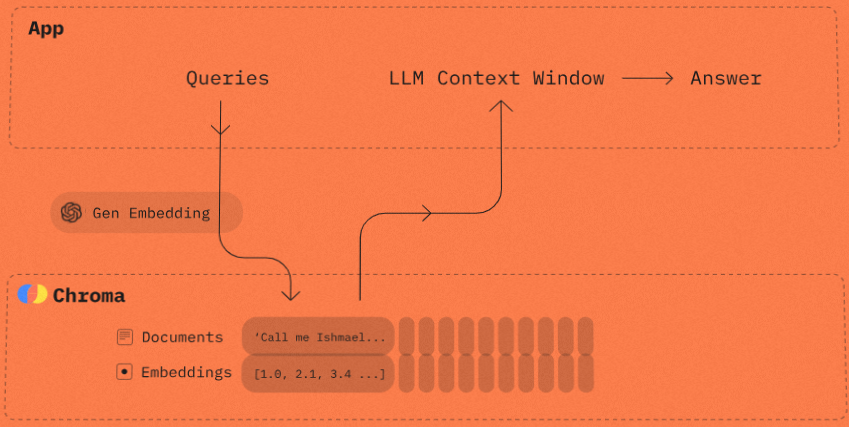

### 2. 사용자 질문과 문서의 임베딩에 대해 Semantic Search하여 가장 유사한 문서 찾기

In [10]:
# Create the retriever and the query-interface. 
# split한 pdf를 embedding vector로 변환 -> 저장한 문서와 사용자 질문을 embedding으로 변환한 벡터 간 cosine유사도 계산 -> 가장 유사한 k개의 문서 검색 (Semantic Search)
retriever = vector_index.as_retriever(
    search_type="similarity", # Cosine Similarity
    search_kwargs={
        "k": 3, # Select top k search results
    } 
)

# 이거는 나중에 뭐 문서 하나에 그냥 다 때려박을 수도?

In [11]:
retriever.get_relevant_documents("강아지가 혈변을 봤어")

/Users/hyunowk/opt/anaconda3/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


[Document(metadata={'page': 8, 'source': 'Pawmeal_개대변8.pdf'}, page_content='똥의의미똥속의피제공강아지똥에피가보이면침착하세요색깔은신선한빨간색이거나매우진한빨간색일수있습니다그러나원인은비교적사소한것부터매우심각한것까지다양합니다사소한문제로는대변이너무딱딱해서나올때마찰이생길수있다는것입니다더심각한경우는개의몸에기생충이나벌레가있어서상처를입는경우입니다극단적인문제는궤양이나종양이있을가능성이있기때문입니다다시한번말씀드리지만번배변을한후에도여전히피가난다면개를병원에데려가야할때입니다더이상기다리지마세요잠재적인건강문제가악화되지않도록하세요가능하다면피가묻은똥샘플도가져가세요추가진단에도움이될것입니다추가배설물섭취내개가자기똥을먹어요\n\uf115\uf109\uf130\uf126\uf15a'),
 Document(metadata={'page': 8, 'source': 'Pawmeal_개대변8.pdf'}, page_content='똥의의미똥속의피제공강아지똥에피가보이면침착하세요색깔은신선한빨간색이거나매우진한빨간색일수있습니다그러나원인은비교적사소한것부터매우심각한것까지다양합니다사소한문제로는대변이너무딱딱해서나올때마찰이생길수있다는것입니다더심각한경우는개의몸에기생충이나벌레가있어서상처를입는경우입니다극단적인문제는궤양이나종양이있을가능성이있기때문입니다다시한번말씀드리지만번배변을한후에도여전히피가난다면개를병원에데려가야할때입니다더이상기다리지마세요잠재적인건강문제가악화되지않도록하세요가능하다면피가묻은똥샘플도가져가세요추가진단에도움이될것입니다추가배설물섭취내개가자기똥을먹어요\n\uf115\uf109\uf130\uf126\uf15a'),
 Document(metadata={'page': 8, 'source': 'Pawmeal_개대변8.pdf'}, page_content='똥의의미똥속의피제공강아지똥에피가보이면침착하세요색깔은신선한빨간색이거나매우진한빨간색일수있습니다그러나원인은비교적사소한것부터매우심각한것까지다양합니다사소한문제로는대변이너무딱딱해서나올때마찰이생길수있다는것입니다더심각한경우는개의몸에기생충이나벌레

### 3. Semantic Search로 찾은 문서를 사용자 질문과 함께 ChatGPT에 보내서 답변 생성하기

<Retrieval 기반 QA class>
RetrievalQA vs ConversationalRetrievalChain

1. RetrievalQA : Retrieval만을 사용하여 답변 생성
2. ConversationalRetrievalChain : Chat History 기억 & Retrieval 같이 사용 -> 지속적인 대화에 good

In [12]:
# temperature=0 : 보수적이고 일관적인 답변 생성
# chain_type : stuff, map_reduce, refine, map_rerank 중 refine은 대화의 맥락을 지속적으로 개선하고 유지할 때 사용

# Create the chain for allowing us to chat with the document.
qa_chain = RetrievalQA.from_chain_type(
    llm=ChatOpenAI(temperature=0, model="gpt-4"), 
    chain_type="stuff", 
    retriever=retriever,
    return_source_documents=True # source document which were used as source files
)

=> qa_chain 에 대해 invoke() 메소드를 사용해서 사용자 질문을 던지면, ChatGPT는 답변 결과(result)와 답변을 생성할 때 참고했던 소스 문서(source_documents)를 반환

In [13]:
# query the pdf file
qa_chain.invoke("강아지 대변")

{'query': '강아지 대변',
 'result': '강아지의 대변 상태를 개선하는 방법은 여러 가지가 있습니다. \n\n1. 강아지의 대변이 물렁한 경우: 부드러운 찜 음식을 먹이세요. 브로콜리와 호박과 같은 찜 음식을 개가 좋아하는 고기와 함께 섞어서 고려할 수 있습니다. 이 기간 동안 야채나 전분을 조금 더 주는 것은 괜찮습니다. 그 목적은 신체를 정화하고 대변을 굳히는 데 도움이 되기 때문입니다.\n\n2. 강아지의 대변이 부드럽거나 묽은 경우: 현재 먹이는 음식, 특히 새로운 음식인 경우를 식사당 덜 먹이세요. 몇 끼를 계속하고 며칠 동안 똥 상태를 모니터링하세요. 느슨한 대변이 개선되는지 확인하세요. 강아지의 현재 새로운 사료에 소량의 깬 찐 호박을 첨가하는 것을 고려해 보세요. 이 기간 동안 깨끗한 물을 충분히 공급하세요.\n\n3. 강아지의 대변이 매우 딱딱한 경우: 개가 물을 더 많이 마시게 하세요. 개가 그릇에서 스스로 물을 마신다면 좋습니다. 개가 마시기를 거부한다면 개가 좋아하는 음식에 물을 조금 더 하거나 찐 야채와 고기 국물을 주는 것을 고려해 보세요.\n\n이러한 팁들은 신중하게 고려해야하며 똥 문제가 처음 발견될 때만 사용해야 합니다. 똥 문제가 일 이상 지속되면 수의사의 조언을 구하는 것을 고려하세요.',
 'source_documents': [Document(metadata={'page': 10, 'source': 'Pawmeal_개대변8.pdf'}, page_content='강아지배변을개선하는일반적인치료법정상적인상황에서라라의부모로서우리는반려견의똥을개선하기위한몇가지친절한팁을공유하고자합니다이팁은신중하게고려해야하며똥문제가처음발견될때만사용해야합니다똥문제가일이상지속되면수의사의조언을구하는것을고려하세요강아지의똥이라오사이설사물렁한똥인경우개의뱃속에부드러운일반찜음식을먹이세요브로콜리와호박과같은찜음식을개가좋아하는고기와함께섞어서고려할수있습니다이기간동안야채나전분을조금더주는것은괜찮습니다그목적은신체를정화하고대변을굳히는데도움이되기때문입니다뼈를먹이는것도또

### 4. 다른 pdf file을 로딩하고 embedding으로 변환하여 VectorDB에 추가하기

In [14]:
'''
# Adding additional documents to vector store
# Load a PDF file, using the LangChain PyPDF loader
loader = PyPDFLoader("Chain-of-Thought-prompting.pdf")

# Split the text in chunks, using LangChain Recursive Character Text Splitter
pages_new = loader.load_and_split(text_splitter)

# Add additional documents to vector store
_ = vector_index.add_documents(pages_new)

# Create a persistent, file-based vector store, using Chroma vector store.
vector_index.persist()

# Query the pdf file
qa_chain.invoke("What is Chain-of-Thought Prompting?")
'''

'\n# Adding additional documents to vector store\n# Load a PDF file, using the LangChain PyPDF loader\nloader = PyPDFLoader("Chain-of-Thought-prompting.pdf")\n\n# Split the text in chunks, using LangChain Recursive Character Text Splitter\npages_new = loader.load_and_split(text_splitter)\n\n# Add additional documents to vector store\n_ = vector_index.add_documents(pages_new)\n\n# Create a persistent, file-based vector store, using Chroma vector store.\nvector_index.persist()\n\n# Query the pdf file\nqa_chain.invoke("What is Chain-of-Thought Prompting?")\n'

vector_index.add_documents() : 기존의 Chroma Vector DB에 임베딩 변환, 저장해줌.

persist() : 파일 기반의 Vector Store에 영구저장 가능.

### 5. 대화 기록에 대한 기억을 사용하여 ChatGPT 답변 생성하기

ConversationalRetrievalChain class : 대화내역 기억(Chat History Memory) + Retrieval => 사용자 질의에 대한 답변 생성

In [15]:
conv_chain = ConversationalRetrievalChain.from_llm(
    ChatOpenAI(temperature=0, model="gpt-4"),
    retriever=retriever,
)

In [16]:
chat_history = []

query = "강아지 똥 색깔"    # query 변경 가능
result = conv_chain.invoke({"question": query, "chat_history": chat_history})

In [17]:
print(result["answer"])

강아지의 똥 색깔은 일반적으로 갈색입니다. 하지만 이 문맥에서는 강아지의 똥에 피가 섞여 나오는 경우를 설명하고 있습니다. 피가 섞인 똥의 색깔은 신선한 빨간색이거나 매우 진한 빨간색일 수 있습니다.


=> chat_history : conv_chain.invoke()로 질의응답할 때마다 {"chat_history": chat_history}에 QnA 내역을 순서대로 저장

In [18]:
# while True문으로 위에꺼가 반복되면 반복문 바깥에서 append하면 될 듯
chat_history.append((query, result["answer"]))

In [19]:
chat_history

[('강아지 똥 색깔',
  '강아지의 똥 색깔은 일반적으로 갈색입니다. 하지만 이 문맥에서는 강아지의 똥에 피가 섞여 나오는 경우를 설명하고 있습니다. 피가 섞인 똥의 색깔은 신선한 빨간색이거나 매우 진한 빨간색일 수 있습니다.')]

In [20]:
# 질의응답 기억을 참고하여 새로운 답변도 생성 가능.ㅋㅋ
# 위의 답변을 줄여서 요약하라고 해볼게연?

query = "위의 답변을 더 짧게 말해줄 수 있어?"
result = conv_chain.invoke({"question": query, "chat_history": chat_history})

In [21]:
print(result)

{'question': '위의 답변을 더 짧게 말해줄 수 있어?', 'chat_history': [('강아지 똥 색깔', '강아지의 똥 색깔은 일반적으로 갈색입니다. 하지만 이 문맥에서는 강아지의 똥에 피가 섞여 나오는 경우를 설명하고 있습니다. 피가 섞인 똥의 색깔은 신선한 빨간색이거나 매우 진한 빨간색일 수 있습니다.')], 'answer': '개가 물을 더 많이 마시게 하려면 음식에 물을 추가해 수프처럼 만들어 보세요. 어떤 개는 수프의 고기 맛을 좋아하므로 이 방법이 효과적일 수 있습니다.'}


In [22]:
# 이 또한 반복문 안에 없을 땐, 별도로 chat_history로 들어가도록 chat_history.append((query, result["answer"]))로 저장.

chat_history.append((query, result["answer"]))

In [23]:
chat_history

[('강아지 똥 색깔',
  '강아지의 똥 색깔은 일반적으로 갈색입니다. 하지만 이 문맥에서는 강아지의 똥에 피가 섞여 나오는 경우를 설명하고 있습니다. 피가 섞인 똥의 색깔은 신선한 빨간색이거나 매우 진한 빨간색일 수 있습니다.'),
 ('위의 답변을 더 짧게 말해줄 수 있어?',
  '개가 물을 더 많이 마시게 하려면 음식에 물을 추가해 수프처럼 만들어 보세요. 어떤 개는 수프의 고기 맛을 좋아하므로 이 방법이 효과적일 수 있습니다.')]

-----------------------------------------------------------

### 6. JSON

JsonOutputParser : 사용자가 원하는 JSON 스키마를 지정할 수 있게 해주며, 그 스키마에 맞게 LLM에서 데이터를 조회하여 결과를 도출해줌.

In [76]:
import json

# JSON 파일 읽기
with open('dummy.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [77]:
json_data

{'DOG_id': 121,
 'poo_type': 'softmix',
 'poo_color': [['#0b0603', 34.68],
  ['#191008', 33.05],
  ['#261d12', 24.35],
  ['#372e24', 7],
  ['#74726d', 0.91]],
 'color_RGB': '0,0,255'}

In [81]:
# 데이터 구조화
from pydantic import BaseModel
from typing import Dict, Optional

class FecalAnalysis(BaseModel):
    poo_type: Optional[str]  # 변의 유형, Optional로 설정하여 값이 없을 경우 처리 가능
    poo_color: Dict[str, float]  # 딕셔너리로 설정

# poo_colors 색상 정보 변환 함수 (원래는 warning_color 변환)
def parse_colors(colors):
    # 리스트인 경우, 각 색상 코드와 그 확률로 딕셔너리 변환
    if isinstance(colors, list):
        return {color[0]: color[1] for color in colors}
    return {}

# FecalAnalysis로 데이터 변환
analysis = FecalAnalysis(
    poo_type=json_data["poo_type"],  # 변의 유형
    poo_color=parse_colors(json_data["poo_color"])  # 색상 정보를 dictionary로 변환
)

print(analysis)

poo_type='softmix' poo_color={'#0b0603': 34.68, '#191008': 33.05, '#261d12': 24.35, '#372e24': 7.0, '#74726d': 0.91}


In [128]:
from langchain.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate

# 프롬프트 템플릿 정의
chat_prompt = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template(
        "당신은 필요한 말만 하는, 강아지 대변에 특화된 수의사입니다."
    ),

    HumanMessagePromptTemplate.from_template(
        """
        나한테 우리 강아지 건강 상태를 파악하기 위해서, 
        FAISS 내 저장되어있는 문서를 기반으로
        {poo_color}를 갖고 있는 {poo_type}형태의 대변에 대한 분석 결과를 바탕으로 건강상태를 분석하기 위한 질문을 한가지 던져줘
        """
    )
])

# 질문할 내용이 없으면, 만약 건강에 이상이 있는거 같으면, 병원을 가라고 해주고, 이상이 없는거 같으면 결론을 내려주면 좋을거 같아.

# prompt 포맷팅
formatted_prompt = chat_prompt.format(
    poo_type=analysis.poo_type,
    poo_color=analysis.poo_color
)

print(formatted_prompt)

System: 당신은 필요한 말만 하는, 강아지 대변에 특화된 수의사입니다.
Human: 
        강아지의 대변 상태에 대해 분석 결과 :
        - 대변 단계: softmix
        - 똥 색상: {'#0b0603': 34.68, '#191008': 33.05, '#261d12': 24.35, '#372e24': 7.0, '#74726d': 0.91}

        나한테 우리 강아지 건강 상태를 파악하기 위해서, 
        FAISS 내 저장되어있는 문서를 기반으로
        {'#0b0603': 34.68, '#191008': 33.05, '#261d12': 24.35, '#372e24': 7.0, '#74726d': 0.91}를 갖고 있는 softmix형태의 대변에 대한 분석 결과를 바탕으로 건강상태를 분석하기 위한 질문을 한가지 던져줘
        


첫째, 위의 강아지 대변 상태에 대한 분석 결과를 바탕으로 한 번에 하나의 질문씩 던져줘.
둘째, FAISS 내 저장되어있는 문서를 기반으로 대변 상태에 대해서 정리하면서 강아지의 식습관, 최근에 먹은 사료, 기존과 변경된 사료, 갖고 있는 질병, 평소 의심할 만한 다른 증상 등이 있는지도 확인하면서 자연스럽게 질문 하나를 던져야해.
셋째, 질문을 할 때 '첫번째, 두번째'와 같은 글머리 표현 없이 그냥 바로 질문에 돌입해.
넷째, poo_color에서 받은 색상 코드를 직접적으로 사용자에게 굳이 언급해야한다면, 코드 그 자체가 아니라, 초록색, 흑갈색, 빨강에 가까운 갈색 등과 같이 구체적인 색상으로 표현해.
다섯째, poo_type에서 받은 대변의 상태를 직접적으로 사용자에게 굳이 언급해야한다면, 영어로 말하지 말고 촉촉하다, 딱딱하다 등 이해하기 쉽게 설명을 풀어서 표현해.
여섯째, 질문할 때, 한 문장만 말해.

In [129]:
# langchain model과의 통합
from langchain.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain

# LLM 모델 초기화
llm = ChatOpenAI(model_name="gpt-4", temperature=0.7)

# LLMChain 생성
chain = LLMChain(llm=llm, prompt=chat_prompt)

# 모델 실행
response = chain.run(
    poo_type=analysis.poo_type,
    poo_color="\n".join([f"{color}({prob}%)" for color, prob in analysis.poo_color.items()])
)

print(response)

강아지가 최근에 식단 변경이나 스트레스를 받았는지 알 수 있을까요?


In [103]:
'''예시
import json
from pydantic import BaseModel
from typing import Dict
from langchain.prompts import ChatPromptTemplate, SystemMessage, HumanMessagePromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain

# 1. JSON 파일 읽기
with open('path_to_json_file.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 2. 데이터 모델링 (선택사항)
class FecalAnalysis(BaseModel):
    fecal_stage: int
    main_color: str
    warning_colors: Dict[str, float]

analysis = FecalAnalysis(**data)

# 3. ChatPromptTemplate 정의 (수의사 말투 적용)
chat_prompt = ChatPromptTemplate.from_messages([
    SystemMessage(content="당신은 매우 정중하고 차분한 수의사입니다."),
    HumanMessagePromptTemplate.from_template("""
        강아지의 대변 상태에 대해 분석한 결과는 다음과 같습니다:
        - 대변 단계: {fecal_level}
        - 주 색상: {main_color}
        - 경고 색상: {warning_colors}

        이 정보를 바탕으로 사용자에게 어떤 질문을 드릴까요?
    """)
])

# 4. LLM 모델 초기화
llm = ChatOpenAI(model_name="gpt-4", temperature=0.7)

# 5. LLMChain 생성
chain = LLMChain(llm=llm, prompt=chat_prompt)

# 6. 모델 실행
response = chain.run(
    fecal_stage=analysis.fecal_stage,
    main_color=analysis.main_color,
    warning_colors=", ".join([f"{color}({prob}%)" for color, prob in analysis.warning_colors.items()])
)

print(response)
'''

'예시\nimport json\nfrom pydantic import BaseModel\nfrom typing import Dict\nfrom langchain.prompts import ChatPromptTemplate, SystemMessage, HumanMessagePromptTemplate\nfrom langchain.chat_models import ChatOpenAI\nfrom langchain.chains import LLMChain\n\n# 1. JSON 파일 읽기\nwith open(\'path_to_json_file.json\', \'r\', encoding=\'utf-8\') as f:\n    data = json.load(f)\n\n# 2. 데이터 모델링 (선택사항)\nclass FecalAnalysis(BaseModel):\n    fecal_stage: int\n    main_color: str\n    warning_colors: Dict[str, float]\n\nanalysis = FecalAnalysis(**data)\n\n# 3. ChatPromptTemplate 정의 (수의사 말투 적용)\nchat_prompt = ChatPromptTemplate.from_messages([\n    SystemMessage(content="당신은 매우 정중하고 차분한 수의사입니다."),\n    HumanMessagePromptTemplate.from_template("""\n        강아지의 대변 상태에 대해 분석한 결과는 다음과 같습니다:\n        - 대변 단계: {fecal_level}\n        - 주 색상: {main_color}\n        - 경고 색상: {warning_colors}\n\n        이 정보를 바탕으로 사용자에게 어떤 질문을 드릴까요?\n    """)\n])\n\n# 4. LLM 모델 초기화\nllm = ChatOpenAI(model_name="gpt-4", temperature

In [ ]:
# BE와 연동
'''
import requests

def get_disease_info(DOG_id):
    response = requests.get(f"http://localhost:8000")
    if response.status_code == 200:
        return response.json()
    else:
        return None

disease_info = get_disease_info(DOG_id)
'''

In [125]:
# FAISS와의 연동 (RAG)
from langchain_community.vectorstores import FAISS
from langchain.chat_models import ChatOpenAI
from langchain_community.embeddings import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader, PyPDFLoader
from langchain.memory import ConversationBufferWindowMemory


# 텍스트 문서 로드 및 분할
loader = PyPDFLoader('animals_poop.pdf')
documents = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=10)
texts = text_splitter.split_documents(documents)

# FAISS VectorDB 생성
embeddings = OpenAIEmbeddings()
vector_store = FAISS.from_documents(texts, embeddings)
retriever = vector_store.as_retriever()

# RAG 체인 생성
from langchain.chains import ConversationalRetrievalChain

memory=ConversationBufferWindowMemory(memory_key="chat_history", k=5, return_messages=True)

rag_chain = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=retriever,
    memory=memory
)


In [126]:
# 질문 정의
user_question = "사료는 안 바꿨는데, 변 색이 좀 이상하네?"

# 체인 실행
response = rag_chain.run(
    question=user_question,  # 질문 전달
    chat_history=chat_history  # 이전 대화 기록 전달
)

# 응답 출력
print("Poopy 왈.. :")
print(response)

Poopy 왈.. :
강아지의 변 색은 건강 상태를 나타내는 중요한 지표일 수 있습니다. 변색이 발생하면 다양한 요인이 원인이 될 수 있습니다. 만약 강아지의 변이 노란색, 검은색, 갈색 또는 초록색이라면 이는 설사를 나타낼 수 있습니다. 이러한 증상이 지속될 경우, 전문가의 도움을 청하는 것이 좋습니다. 강아지의 변 색이나 텍스처가 변화했다면, 반려동물의 건강을 확인하기 위해 수의사에게 문의하는 것이 가장 좋습니다.


In [127]:
# 메모리 객체에서 대화 내용 가져오기
chat_history = memory.chat_memory.messages

# 대화 내용 출력
for message in chat_history:
    print(f"{message.type}: {message.content}")

human: 사료는 안 바꿨는데, 변 색이 좀 이상하네?
ai: 강아지의 변 색은 건강 상태를 나타내는 중요한 지표일 수 있습니다. 변색이 발생하면 다양한 요인이 원인이 될 수 있습니다. 만약 강아지의 변이 노란색, 검은색, 갈색 또는 초록색이라면 이는 설사를 나타낼 수 있습니다. 이러한 증상이 지속될 경우, 전문가의 도움을 청하는 것이 좋습니다. 강아지의 변 색이나 텍스처가 변화했다면, 반려동물의 건강을 확인하기 위해 수의사에게 문의하는 것이 가장 좋습니다.


In [118]:
'''
# ConversationBufferWindowMemory를 쓰지 않고 chat history를 남기고 싶을 때.

# 초기 대화 기록 설정 (비어 있는 리스트로 시작)
chat_history = []

# 질문 정의
user_question = "강아지의 대변이 평소와 다른데, 어떤 문제일 수 있나요?"

# 체인 실행
response = rag_chain.run(
    question=user_question,  # 질문 전달
    chat_history=chat_history  # 이전 대화 기록 전달
)

chat_history.append((user_question, response))  # 히스토리에 질문과 응답 추가

# 응답 출력
print("Poopy 왈.. :")
print(response)
print(chat_history)
'''

Poopy 왈.. :
강아지의 대변 상태가 평소와 다르다면 여러 가지 원인이 있을 수 있습니다. 

1. 설사 또는 물렁한 대변: 이는 신규 사료 반응, 식품 알레르기, 장내 기생충, 감염 등으로 인해 발생할 수 있습니다. 

2. 부드럽거나 묽은 대변: 새로운 음식을 과다 섭취하였거나, 개체가 현재 먹고 있는 음식에 대해 잘 소화하지 못하는 경우 발생할 수 있습니다.

3. 딱딱한 대변: 물을 충분히 섭취하지 않거나, 음식물 섭취가 적어 변비가 발생한 경우입니다.

4. 피가 섞인 대변: 마찰로 인한 사소한 문제부터 기생충, 궤양, 종양 등 심각한 건강 문제까지 다양한 원인이 있을 수 있습니다.

5. 자기의 대변을 먹는 경우: 이는 행동적인 문제일 수도 있고, 영양소 부족, 스트레스, 장애 등으로 인해 발생할 수 있습니다.

이외에도 다양한 원인이 있을 수 있으므로, 대변 상태가 일상적이지 않거나, 문제가 지속되는 경우에는 반드시 수의사의 도움을 청하시는 것이 좋습니다.
